# Homework #5

27.11.2017
Python 3.6

### Метод сеток для решения обыкновенного дифференциального уравнения 2-го порядка, краевая задача

#### Правая прогонка

y''+ p(x) * y' + q(x) * y = f(x)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Модельное решение

$$y'' - \log(1+3x)y = 6*(x+2) - (x+2)^3\log(1+3x)$$
$$y = (x+2)^3$$

In [24]:
n = 100
r = 1
l = 0

h = (r-l)/n

X = np.linspace(0, 1, num=n+1)

In [25]:
X

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,
        0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,
        0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,
        0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,
        0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,
        0.99,  1.  ])

In [26]:
def polynome(x):
    return (x+2.)*(x+2.)*(x+2.)

def q(x):
    return -np.log(1. + 3.*x)

def f(x):
    return 6.*(x+2.) - (x+2.)*(x+2.)*(x+2.)*np.log( 1. + 3.*x)

def p(x):
    return 0.

def a(i):
    return 1.

def c(i):
    return 1.

def b(i):
    return 2. - h * h * q(X[i])

def g(i):
    return h * h * f(X[i])

In [27]:
h

0.01

In [28]:
kappa_1 = (-q(X[1])*h*h -2.) / (-2.- h)
upsilon_1 = (16.*h + g(1)) / (-2. - h)
kappa_2 = (2. + q(X[n-1])*h*h) / (2 + 0.6 * h)
upsilon_2 = (70.2 * h  - g(n-1)) / (2 + 0.6 * h)

print(kappa_2,upsilon_2)

0.996940240972 0.35089310355


In [29]:
u = [0 for i in range(0,n+1)]
v = [0 for i in range(0,n+1)]
Y = np.array([0 for i in range(0,n+1)], dtype = float)

u[n] = kappa_2
v[n] = upsilon_2

for i in reversed(range(0,n)):
    u[i] = 1. / (b(i) - u[i+1])
    v[i] = (v[i+1] - g(i))/(b(i) - u[i+1])

Y[0] = (upsilon_1 + kappa_1*v[1])/(1 - kappa_1*u[1])

for i in range(1,n+1):
    Y[i] = Y[i-1]*u[i]+v[i]

In [30]:
vals = np.array([polynome(i) for i in X], dtype = float)
abs(Y-vals)

array([  7.93626794e-05,   7.77596077e-05,   7.61567659e-05,
         7.45543678e-05,   7.29526122e-05,   7.13516834e-05,
         6.97517518e-05,   6.81529747e-05,   6.65554968e-05,
         6.49594505e-05,   6.33649568e-05,   6.17721256e-05,
         6.01810561e-05,   5.85918370e-05,   5.70045474e-05,
         5.54192566e-05,   5.38360251e-05,   5.22549041e-05,
         5.06759366e-05,   4.90991572e-05,   4.75245926e-05,
         4.59522616e-05,   4.43821758e-05,   4.28143393e-05,
         4.12487494e-05,   3.96853966e-05,   3.81242646e-05,
         3.65653309e-05,   3.50085667e-05,   3.34539372e-05,
         3.19014017e-05,   3.03509138e-05,   2.88024216e-05,
         2.72558676e-05,   2.57111892e-05,   2.41683185e-05,
         2.26271827e-05,   2.10877041e-05,   1.95498000e-05,
         1.80133834e-05,   1.64783622e-05,   1.49446403e-05,
         1.34121170e-05,   1.18806873e-05,   1.03502419e-05,
         8.82066759e-06,   7.29184692e-06,   5.76365853e-06,
         4.23597712e-06,

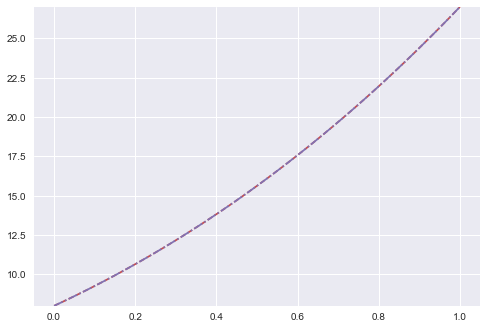

In [31]:
plt.plot( X, Y, linestyle='dashed')
plt.plot(X, vals, linestyle='-.')
plt.ylim(8.,27.)
plt.show()

In [32]:
def TDMAsolver(a, b, c, d):
    '''
    TDMA solver, a b c d can be NumPy array type or Python list type.
    refer to http://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm
    and to http://www.cfd-online.com/Wiki/Tridiagonal_matrix_algorithm_-_TDMA_(Thomas_algorithm)
    '''
    nf = len(d) # number of equations
    ac, bc, cc, dc = map(np.array, (a, b, c, d)) # copy arrays
    for it in range(1, nf):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]
        
    xc = bc
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    return xc

A = np.array([1. for i in range(1,n)]+[-kappa_2]) 
B = np.array([1.]+[-b(i) for i in range(1,n)]+[1.])
C = np.array([-kappa_1]+[1. for i in range(1,n)])
D = np.array([upsilon_1]+[g(i) for i in range(1,n)]+[upsilon_2]) 

y2=TDMAsolver(A, B, C, D)
abs(y2)

array([  7.99992064,   8.12052324,   8.24233184,   8.36535245,
         8.48959105,   8.61505365,   8.74174625,   8.86967485,
         8.99884544,   9.12926404,   9.26093664,   9.39386923,
         9.52806782,   9.66353841,   9.800287  ,   9.93831958,
        10.07764216,  10.21826075,  10.36018132,  10.5034099 ,
        10.64795248,  10.79381505,  10.94100362,  11.08952419,
        11.23938275,  11.39058531,  11.54313788,  11.69704643,
        11.85231699,  12.00895555,  12.1669681 ,  12.32636065,
        12.4871392 ,  12.64930974,  12.81287829,  12.97785083,
        13.14423337,  13.31203191,  13.48125245,  13.65190099,
        13.82398352,  13.99750606,  14.17247459,  14.34889512,
        14.52677365,  14.70611618,  14.88692871,  15.06921724,
        15.25298776,  15.43824629,  15.62499882,  15.81325135,
        16.00300987,  16.1942804 ,  16.38706893,  16.58138145,
        16.77722398,  16.97460251,  17.17352304,  17.37399157,
        17.57601411,  17.77959664,  17.98474518,  18.19

## Модельное решение 2

### Задача
y'(0) = 0.5 * y(0) + 0.1

y'(1) =-0.3 * y(1) + 0.2

-y'' + log(1+3x)*y = x - x^2


In [33]:
n = 10
r = 1
l = 0

h = (r-l)/n

X = np.linspace(0, 1, num=n+1)

In [34]:
def q(x):
    return -np.log( 1. + 3.*x)

def f(x):
    return -x + x*x

def p(x):
    return 0.

In [35]:
def a(i):
    return 1. + (h / 2.)*p(X[i])

def c(i):
    return 1. - (h / 2.)*p(X[i])

def b(i):
    return 2. - h * h * q(X[i])

def g(i):
    return h * h * f(X[i])

In [36]:
kappa_1 = (-q(X[1])*h*h -2.) / (-2.- h)
upsilon_1 = (0.2*h + g(1)) / (-2. - h)
kappa_2 = (2. + q(X[n-1])*h*h) / (2 + 0.6 * h)
upsilon_2 = (0.4 * h  - g(n-1)) / (2 + 0.6 * h)

In [37]:
u = [0 for i in range(0,n+1)]
v = [0 for i in range(0,n+1)]
Y = np.array([0 for i in range(0,n+1)], dtype = float)

u[n] = kappa_2
v[n] = upsilon_2

for i in reversed(range(0,n)):
    u[i] = c(i) / (b(i) - a(i)*u[i+1])
    v[i] = (a(i)*v[i+1] - g(i))/(b(i) - a(i)*u[i+1])

Y[0] = (upsilon_1 + kappa_1*v[0])/(1 - kappa_1*u[0])

for i in range(1,n+1):
    Y[i] = Y[i-1]*u[i]+v[i]

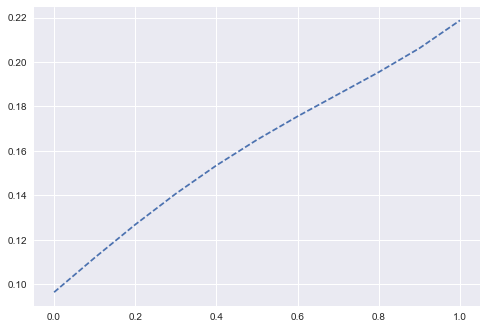

In [38]:
plt.plot( X, Y, linestyle='dashed')
plt.show()